In [1]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset
import torch
import numpy as np
from tqdm.auto import tqdm
from datasets import DatasetDict
from datasets import load_dataset, DatasetDict
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
datasets = load_dataset("glnmario/news-qa-summarization")

In [3]:
# Convert datasets to DataFrame
df_train = datasets['train'].to_pandas()

# Split dataset
train_set, val_set = train_test_split(df_train, test_size=0.2, random_state=42)

In [4]:
train_set

,story,questions,answers,summary
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...
...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ..."
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ..."


In [5]:
val_set

,story,questions,answers,summary
8954,"ROME, Italy -- Captain Javier Zanetti saved In...","[Who scored a late goal?, What position is AC ...","[[Javier Zanetti], [fifth place], [fifth], [Ca...",Javier Zanetti scores a late goal to earn Inte...
6495,"In Fad-Free Nutrition, exclusively on CNN.com,...","[which brands were affected by the recall?, Wh...","[[industrial peanut butter], [industrial peanu...",Peanut product recall putting a damper on Amer...
4184,(CNN) -- There's always been something about M...,"[Who suffers from dementia?, What Torrance sai...","[[Baroness Thatcher's], [a pitch-perfect perfo...","David Torrance: Margaret Thatcher biopic ""The ..."
7015,"LONDON, England (CNN) -- Britain's Queen Eliza...","[what is the medal made out of?, What was the ...","[[sterling silver emblem], [a sterling silver ...",Elizabeth Cross for next of kin of armed force...
5860,"DERBY, England -- Substitute Emmanuel Adebayor...","[What park did Arsenal defeat Derby?, What num...","[[Pride], [four], [Emmanuel Adebayor]]",Emmanuel Adebayor hits hat-trick as Arsenal th...
...,...,...,...,...
7924,MEXICO CITY (CNN) -- Mexican President Felipe ...,"[Which commodity will have its price frozen?, ...","[[gasoline], [small- and medium-size], [Presid...",Mexico leader says gasoline prices will be fro...
1527,(CNN) -- Authorities are investigating a lette...,"[To whom was the bomb addressed?, what does Ne...","[[CEO of Deutsche Bank], [The device, which co...",A letter bomb is addressed to the CEO of Deuts...
8922,"RIO DE JANEIRO, Brazil (CNN) -- The death toll...","[What is the death toll in southern Brazil?, W...","[[116], [be careful with food and water they c...",Death toll from flooding in southern Brazil re...
3352,(CNN) -- Scientists say a very rare find of so...,[How many fossilized pterodactyls were found i...,"[[20], [researchers], [evidence of a controver...",Researchers say rare fossil find provides evid...


## EDA

In [19]:
!pip install emoji demoji ftfy


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Extract emoji
import emoji
import demoji
import ftfy

In [10]:
# cek emotikon dalam teks
def extract_emotikon(text):
    text = ftfy.fix_text(text)
    emojis = emoji.emoji_list(text)
    emojis_str = ""
    if emojis:
      return " ".join([i['emoji'] for i in emojis])
    else:
      return ""

In [11]:
train_set

,story,questions,answers,summary
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...
...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ..."
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ..."


In [12]:
train_set["extract_emoji"] = train_set["story"].apply(lambda x: extract_emotikon(x))

In [13]:
train_set[train_set["extract_emoji"]!=""]

,story,questions,answers,summary,extract_emoji
4771,(Mashable) -- Social media management company ...,"[What is adjustable and interactive?, What pag...","[[the Social Page Evaluator], [Facebook], [a F...",A new app helps marketers get a better underst...,©
4877,(PEOPLE.com) -- Shortly after Hugh Hefner and ...,"[What did Hefner say about the puppy?, Who is ...","[[""We both love the puppy,""], [Hugh Hefner], [...",Hugh Hefner and Crystal Harris are fighting ov...,©
4672,"(EW.com) -- On ""A Very She & Him Christmas,"" p...","[What show is she on?, What TV programme is me...","[[""New Girl""], [""New Girl""], [M. Ward,], [""New...",Zooey Deschanel reunites with Portland folkie ...,©
57,(CNET) -- Amazon plans to unveil a thinner Ki...,"[What does Amazon plan to unveil in August?, W...","[[thinner Kindle with a sharper picture], [not...",Amazon plans to unveil a thinner Kindle with a...,©
4924,(The Frisky) -- Even if you're not going to Fi...,[What is the best thing to do to get to know a...,[[hanging out with people who can tell you mor...,It's easy to accidentally wind up in a popular...,©
...,...,...,...,...,...
4869,"(PEOPLE.com) -- Last Tuesday, Danny Cahill bec...","[What is the deejay's name?, The 9th season of...","[[Michael Ventrella,], [""The Biggest Loser: Co...","The ninth season of ""The Biggest Loser"" featur...",©
4642,"(CNNGo) -- Sure, luxury accommodation in Asia ...",[What is providing more affordable accommodati...,"[[Big hotel chains such as InterContinental, S...","High-end hotels building ""economy"" brands that...",©
4931,(The Frisky) -- I've never really been a fan o...,"[Whose language is being decoded?, What else h...","[[the Secret], [""Manslations: Decoding the Sec...","Woman rates Jeff Mac's ""Manslations: Decoding ...",©
4859,"(PEOPLE.com) -- For some people, owing $11 mil...","[What movie did the person star in?, Who used ...","[[""Rush Hour""], [Chris Tucker], [money], [$11 ...","""Rush Hour"" star cracked a few jokes about his...",©


In [14]:
def find_longest_word(tweet):
    words = tweet.split()
    longest_word = max(words, key=len)
    return longest_word

train_set['longest_word'] = train_set['story'].apply(find_longest_word)

train_set

,story,questions,answers,summary,extract_emoji,longest_word
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,"
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,,"investment-friendly,"
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,,investigator
...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,"""
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue


In [17]:
import re

# Regex untuk mendeteksi URL
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Cek apakah ada URL dalam kolom 'story'
train_set['contains_url'] = train_set['story'].apply(lambda x: bool(url_pattern.search(x)))

# Filter baris yang mengandung URL
rows_with_url = train_set[train_set['contains_url'] == True]

# Tampilkan hasil
print(f"Terdapat {len(rows_with_url)} baris yang mengandung URL.")


Terdapat 88 baris yang mengandung URL.


In [18]:
rows_with_url

,story,questions,answers,summary,extract_emoji,longest_word,contains_url
3299,(CNN) -- Richard Deitsch struggled through sev...,"[What did an American lose in China ?, Where s...","[[his passport], [Web sites offer easy-access ...",American who lost passport in China: 'I was a ...,,"www.passportsupport.com,",True
601,(CNN) -- World number two Novak Djokovic beat...,"[What did Serbia reach?, Who reached the quart...","[[quarterfinals of the Davis Cup on Sunday.], ...",Novak Djokovic beats John Isner in five-set ma...,,www.daviscup.com.,True
6202,Editor's note: William Jelani Cobb is Associat...,"[What is a test of obamas policy?, Who cared a...","[[the piracy incident], [William Jelani Cobb],...",William Jelani Cobb: Somalia piracy being seen...,,http://americanexception.com/,True
535,(CNN) -- The new seven wonders of the world w...,"[what was given to the pyramids of giza, Pyram...","[[honorary status,], [Giza in Egypt.], [www.ne...","NEW: .\nStar-studded event in Lisbon, Portugal...",,"www.new7wonders.com,",True
4309,"(CNN) -- Twenty-five years ago, America discov...","[Where are they performing?, Who are performin...","[[Vancouver, British Columbia.], [Christopher ...","Harry Shearer, Christopher Guest and Michael M...",,"http://tap-albums.s5.com/,",True
...,...,...,...,...,...,...,...
7140,"LONDON, England (CNN) -- It takes a savvy film...","[Who is still wildly popular?, Who is Shah Ruk...","[[Shah Rukh Khan,], [India's biggest Bollywood...",Bollywood superstar makes sporting debut as ow...,,www.freewebs.com/srkplace.,True
7805,Los Angeles (CNN) -- Acts signed for October's...,"[What were the fans registering for?, When is ...",[[the better their chances of getting a good s...,Fans start registering for tickets Thursday .\...,,http://www.michaelforevertribute.com/,True
4642,"(CNNGo) -- Sure, luxury accommodation in Asia ...",[What is providing more affordable accommodati...,"[[Big hotel chains such as InterContinental, S...","High-end hotels building ""economy"" brands that...",©,"InterContinental,",True
9914,WASHINGTON (CNN) -- Suzanne Richard was born t...,"[what disorder was she born with, what does ri...","[[osteogenesis imperfecta,], [""I decided a lon...",Theater's artistic director was born with bone...,,(www.socialsecurity.gov).,True


In [19]:
# Pola regex untuk punctuation
punctuation_pattern = r'[^\w\s@]'

# cek tweet apakah ada punctuation
rows_with_punctuation = train_set[train_set['story'].str.contains(punctuation_pattern, regex=True)]

# ekstraksi punctuation
def extract_punctuation(teks):
    punctuations = re.findall(punctuation_pattern, teks)
    return ', '.join(punctuations) if punctuations else None

# add kolom 'punctuations' ke DataFrame
rows_with_punctuation['punctuations'] = rows_with_punctuation['story'].apply(extract_punctuation)

In [20]:
rows_with_punctuation

,story,questions,answers,summary,extract_emoji,longest_word,contains_url,punctuations
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing,False,"(, ), -, -, ., ', ,, ., -, ', ., -, -, ., ,, ,..."
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,",False,"', :, ., ,, ,, ., ., ', ., ,, ,, ,, ., ., ., ,..."
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,,"investment-friendly,",False,"(, ), -, -, ,, ', ,, "", ., "", ', ., ,, ., ., ,..."
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening,False,",, (, ), -, -, -, ., ,, ,, ., ., ,, ,, ,, ., ,..."
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,,investigator,False,"(, ), -, -, ,, ., ,, ., ., ,, ,, ,, ., ,, ,, $..."
...,...,...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered,False,",, (, ), -, -, ', ,, ,, ,, ., ., "", (, ), ,, ""..."
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,""",False,",, (, ), -, -, ., ., ., ,, :, ., ., ,, ., "", ,..."
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.,False,",, (, ), -, -, ,, ,, ., ,, ., ., :, ,, ., :, ...."
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue,False,"(, ), -, -, ,, -, -, -, ,, ., ,, -, ., -, -, '..."


In [21]:
# Pola regex untuk hashtag
hashtag_pattern = r'#\w+'

# cek hashtag
rows_with_hashtag = train_set[train_set['story'].str.contains(hashtag_pattern, regex=True)]

# ekstrak hashtag dari teks
def extract_hashtag(teks):
    hashtags = re.findall(hashtag_pattern, teks)
    return ', '.join(hashtags) if hashtags else None

rows_with_hashtag['hashtags'] = rows_with_hashtag['story'].apply(extract_hashtag)

rows_with_hashtag

C:\Users\hp\AppData\Local\Temp\ipykernel_11340\2580823410.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_hashtag['hashtags'] = rows_with_hashtag['story'].apply(extract_hashtag)


,story,questions,answers,summary,extract_emoji,longest_word,contains_url,hashtags
5792,Cairo (CNN) -- When Azza Hilal Suleiman saw Eg...,"[where did the violence occur?, what did the v...","[[Cairo,], [violent removal of a Muslim woman'...",A video showed police beating a woman and othe...,,demonstrators.,False,"#TahrirWoman, #Bluebra"
4671,(EW.com) -- It's been an interesting year for ...,"[What was Sheen reaction?, Who's career had up...","[[laughed], [Charlie Sheen.], [getting fired f...",Charlie Sheen has had his share of ups and dow...,©,uncomfortable?,False,#winning
4016,(CNN) -- The motorsport community was in mourn...,[What happen to Simoncelli in Malaysia on Sund...,"[[lost his life after a crash], [Marco Simonce...",The motorsport community is in mourning after ...,,Cattolica-born,False,#58
1564,"(CNN) -- Back in the day, Shakespeare enriched...",[what has become a way in which to emphasize i...,"[[the hashtag], [""@""]]",Some internet terms do not translate when appl...,,"#whiskeyandheartache),",False,"#whiskeyandheartache, #JustSayin, #notakidanym..."
8629,New York (CNN) -- Several unions endorsed the ...,[What labor organizers don't have an estimate ...,"[[United Federation of Teachers,], [New York's...",Labor leaders say the Occupy Wall Street prote...,,#occupywallstreet,False,#occupywallstreet
6143,Editor's note: Peter Bregman is chief executiv...,"[People have to rethink what?, What provides a...","[[reorient the focus of your working life], [r...",Peter Bregman: The recession provides an oppor...,,HarvardBusiness.org.,False,"#1, #2"
4134,(CNN) -- The tone of tweets on Twitter and pos...,"[Who is being monitored?, what did cnn do, who...","[[Facebook posts and tweets], [monitored Faceb...","CNN monitored Tweets, Facebook posts by Americ...",,"#stateoftheunion""",False,"#SOTU, #SOTU, #sotu, #sotu, #SOTU, #justsayin,..."
298,(CNN) -- Houston Astros shortstop Miguel Teja...,[When did Tejada lie about his knowledge of pl...,"[[August 26, 2005,], [August 26, 2005,], [Migu...",Court document: Tejada knew teammate used perf...,,performance-enhancing,False,#1
2942,(CNN) -- Nearly a week after the bloody weeken...,"[What is it that CNN'S Iran desk is analyzing,...",[[dozens of Internet videos of the violent dem...,Iran turmoil a hot topic on social media sites...,,anti-government,False,"#iran, #iranelections, #ashura, #hhrs, #news, ..."
8622,New York (CNN) -- Police arrested hundreds of ...,"[What did the protesters block lanes to?, What...","[[Brooklyn Bridge,], [""the whole world is watc...","About 700 protesters were arrested, then relea...",,#occupywallstreet,False,#occupywallstreet


In [22]:
# Pola regex untuk non-alfanumerik
non_alnum_pattern = r'\W+'

# cek non alfanumerik
rows_with_non_alnum = train_set[train_set['story'].str.contains(non_alnum_pattern, regex=True)]

# ekstraksi non alfanumeric
def extract_non_alnum(teks):
    non_alnums = re.findall(non_alnum_pattern, teks)
    return ', '.join(non_alnums) if non_alnums else None

# add kolom 'non_alphanumeric' ke DataFrame
rows_with_non_alnum['non_alphanumeric'] = rows_with_non_alnum['story'].apply(extract_non_alnum)

In [23]:
rows_with_non_alnum

,story,questions,answers,summary,extract_emoji,longest_word,contains_url,non_alphanumeric
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing,False,"(, ) -- , , , , , , . , , ', , , , ,..."
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,",False,"', , : , , , , ., , , , , , , , , ..."
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,,"investment-friendly,",False,"(, ) -- , , , , ', , , , , , , , , , ..."
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening,False,", , (, ) -- , , , , , , -, , , , , ..."
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,,investigator,False,"(, ) -- , , , , , , , , , , , , , ,..."
...,...,...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered,False,", , (, ) -- , , , , , , , , , , ', ..."
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,""",False,", , (, ) -- , , , , , , , , , , , ..."
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.,False,", , (, ) -- , , , , , , , , , , , ..."
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue,False,"(, ) -- , , , , , , , ,, , -, -, -, , ..."


In [24]:
# Pola regex untuk special characters
special_char_pattern = r'[^a-zA-Z0-9\s]'

# cek special characters
rows_with_special_char = train_set[train_set['story'].str.contains(special_char_pattern, regex=True)]

# ekstrak special character
def extract_special_char(teks):
    special_chars = re.findall(special_char_pattern, teks)
    return ', '.join(special_chars) if special_chars else None

# add kolom 'special_characters' ke DataFrame
rows_with_special_char['special_characters'] = rows_with_special_char['story'].apply(extract_special_char)

# sanity check
rows_with_special_char

,story,questions,answers,summary,extract_emoji,longest_word,contains_url,special_characters
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing,False,"(, ), -, -, ., ', ,, ., -, ', ., -, -, ., ,, ,..."
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,",False,"', :, ., ,, ,, ., ., ', ., ,, ,, ,, ., ., ., ,..."
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,,"investment-friendly,",False,"(, ), -, -, ,, ', ,, "", ., "", ', ., ,, ., ., ,..."
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening,False,",, (, ), -, -, -, ., ,, ,, ., ., ,, ,, ,, ., ,..."
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,,investigator,False,"(, ), -, -, ,, ., ,, ., ., ,, ,, ,, ., ,, ,, $..."
...,...,...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered,False,",, (, ), -, -, ', ,, ,, ,, ., ., "", (, ), ,, ""..."
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,""",False,",, (, ), -, -, ., ., ., ,, :, ., ., ,, ., "", ,..."
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.,False,",, (, ), -, -, ,, ,, ., ,, ., ., :, ,, ., :, ...."
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue,False,"(, ), -, -, ,, -, -, -, ,, ., ,, -, ., -, -, '..."


In [26]:
# Pola regex untuk numerik
numeric_pattern = r'\d+'

# cek numerik
rows_with_numeric = train_set[train_set['story'].str.contains(numeric_pattern, regex=True)]

# ekstraksi numerik
def extract_numeric(teks):
    numerics = re.findall(numeric_pattern, teks)
    return ', '.join(numerics) if numerics else None

# add kolom 'numerical' ke DataFrame
rows_with_numeric['numerical'] = rows_with_numeric['story'].apply(extract_numeric)

# sanity check
rows_with_numeric

C:\Users\hp\AppData\Local\Temp\ipykernel_11340\378739636.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_numeric['numerical'] = rows_with_numeric['story'].apply(extract_numeric)


,story,questions,answers,summary,extract_emoji,longest_word,contains_url,numerical
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing,False,"5, 12, 15, 40"
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,",False,"2006, 2006"
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,,"investment-friendly,",False,"300, 1989, 1918, 40, 1980, 31, 1980, 1980, 197..."
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening,False,"55, 20, 13, 31, 50, 250, 13, 25, 25, 18, 40"
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,,investigator,False,"2008, 2, 000, 1, 200, 2008"
...,...,...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered,False,"57, 57, 11, 32, 500, 000, 5, 7, 0, 3, 4, 400, ..."
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,""",False,"11, 30, 2008, 20, 2006, 14, 1, 4, 1968, 2007"
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.,False,"59, 200, 1, 000, 29, 12, 35, 226"
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue,False,"1, 253, 4, 703, 7, 11, 7, 12, 13, 7, 4, 6, 201..."


In [28]:
# Pola regex untuk spasi ganda
double_space_pattern = r'\s\s+'

# cek double space
rows_with_double_space = train_set[train_set['story'].str.contains(double_space_pattern, regex=True)]

# ekstraksi double space
def extract_double_space(teks):
    double_spaces = re.findall(double_space_pattern, teks)
    return ', '.join(double_spaces) if double_spaces else None

# add kolom 'double_spaces' ke DataFrame
rows_with_double_space['double_spaces'] = rows_with_double_space['story'].apply(extract_double_space)

# sanity check
rows_with_double_space

C:\Users\hp\AppData\Local\Temp\ipykernel_11340\2518910065.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_double_space['double_spaces'] = rows_with_double_space['story'].apply(extract_double_space)


,story,questions,answers,summary,extract_emoji,longest_word,contains_url,double_spaces
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing,False,"\n\n, \n\n, \n\n, \n\n, , \n\n, \n\n, \n\n, ..."
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,",False,"\n\n, \n\n, \n\n, \n\n, \n\n, \n\n, \n\..."
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening,False,", , , ,"
5850,"DENVER, Colorado (CNN) -- Investigators will ...","[How many were hospitalized?, Was flight datat...","[[five], [data recorder and cockpit voice reco...","Flight data recorder, cockpit voice recorder r...",,"investigation,""",False,","
2515,(CNN) -- Iranian student Puyan Mahmudian score...,"[What is the name of the campaign?, What is th...","[[""Can You Solve This?""], [Puyan Mahmudian]]",Report: Hundreds of Iranian students rejected ...,,non-governmental,False,"\n\n, \n\n, \n\n, \n\n, \n\n, \n\n, \n\..."
...,...,...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered,False,", ,"
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,""",False,"\n\n, \n\n, \n\n, \n\n, \n\n, , \n\n, ..."
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.,False,", ,"
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue,False,


In [30]:
import nltk
from collections import Counter
from nltk.corpus import stopwords

# download stopword
nltk.download('stopwords')

# Stopwords bahasa Inggris
stopwords_english = set(stopwords.words('english'))

# Ekstrak stopwords dari teks
def extract_stopwords(teks):
    words = teks.split()
    stopwords_in_text = [word for word in words if word.lower() in stopwords_english]
    return ', '.join(stopwords_in_text) if stopwords_in_text else None

# Cek teks dan tambahkan kolom stopwords
train_set['stopwords'] = train_set['story'].apply(extract_stopwords)

# Cek baris yang mengandung stopwords (tidak null)
rows_with_stopwords = train_set[train_set['stopwords'].notnull()]

# Sanity check
rows_with_stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,story,questions,answers,summary,extract_emoji,longest_word,contains_url,stopwords
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing,False,"It, all, down, to, It, doesn't, all, that, wha..."
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,",False,"The, at, has, been, by, the, of, an, and, in, ..."
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,,"investment-friendly,",False,"his, is, in, at, how, the, from, to, of, most,..."
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening,False,"and, in, the, have, in, the, in, the, in, more..."
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,,investigator,False,"In, the, of, have, the, is, a, of, after, of, ..."
...,...,...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered,False,"More, than, a, after, a, at, there, is, no, fr..."
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,""",False,"The, of, are, after, a, over, the, of, their, ..."
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.,False,"At, were, and, more, than, after, a, out, at, ..."
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue,False,"A, for, in, A, out, in, A, a, of, of, has, fro..."


In [31]:
all_stopwords = ' '.join(rows_with_stopwords['stopwords'].dropna()).split(', ')
stopwords_counter = Counter(all_stopwords)

most_common_stopwords = stopwords_counter.most_common(300)

print("\nStopwords terbanyak dalam tweet train_set:")
for word, count in most_common_stopwords:
    print(f"{word}: {count}")


Stopwords terbanyak dalam tweet train_set:
the: 223593
to: 112220
of: 105626
and: 96797
a: 95394
in: 85269
that: 41394
for: 36582
was: 34112
is: 33564
on: 32049
The: 28281
with: 27099
he: 22891
as: 20941
at: 20278
his: 19996
have: 19399
from: 18670
are: 17440
be: 16710
by: 16342
has: 16138
it: 15829
an: 15631
not: 15111
were: 13915
who: 13598
I: 12980
had: 12047
been: 11173
their: 11152
they: 11117
but: 10980
her: 10786
will: 10546
about: 10508
this: 10445
she: 9340
or: 8885
after: 8542
more: 8357
you: 7926
which: 7923
we: 7632
when: 7453
out: 6581
than: 6513
up: 6249
He: 6204
all: 6068
its: 6046
into: 5716
can: 5621
what: 5577
other: 5432
In: 5354
But: 5064
just: 4953
some: 4951
no: 4805
over: 4741
there: 4620
because: 4415
A: 4275
our: 4217
so: 4189
my: 4111
where: 4108
them: 3981
do: 3973
if: 3932
him: 3850
It: 3768
before: 3767
being: 3679
only: 3551
most: 3418
how: 3315
against: 3299
those: 3197
any: 3164
very: 3147
your: 3072
during: 3063
it's: 3045
did: 3025
through: 2903
off: 

C:\Users\hp\AppData\Local\Temp\ipykernel_11340\2888793597.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_set['word_count'], shade=True, color="blue")


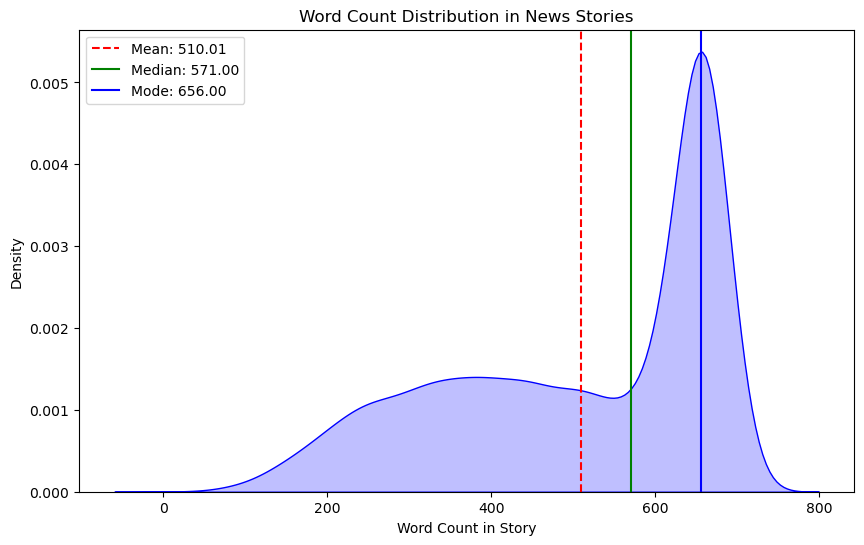

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom untuk menghitung jumlah kata di kolom 'story'
train_set['word_count'] = train_set['story'].apply(lambda x: len(x.split()))

# Hitung nilai rata-rata (mean), median, dan modus dari jumlah kata
mean_count = train_set['word_count'].mean()
median_count = train_set['word_count'].median()
mode_count = train_set['word_count'].mode()[0]

# Membuat KDE plot untuk distribusi jumlah kata
plt.figure(figsize=(10, 6))
sns.kdeplot(train_set['word_count'], shade=True, color="blue")

# Menambahkan garis untuk mean, median, dan mode
plt.axvline(mean_count, color='r', linestyle='--', label=f'Mean: {mean_count:.2f}')
plt.axvline(median_count, color='g', linestyle='-', label=f'Median: {median_count:.2f}')
plt.axvline(mode_count, color='b', linestyle='-', label=f'Mode: {mode_count:.2f}')

# Label dan judul
plt.xlabel('Word Count in Story')
plt.ylabel('Density')
plt.title('Word Count Distribution in News Stories')
plt.legend()

# Menampilkan plot
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


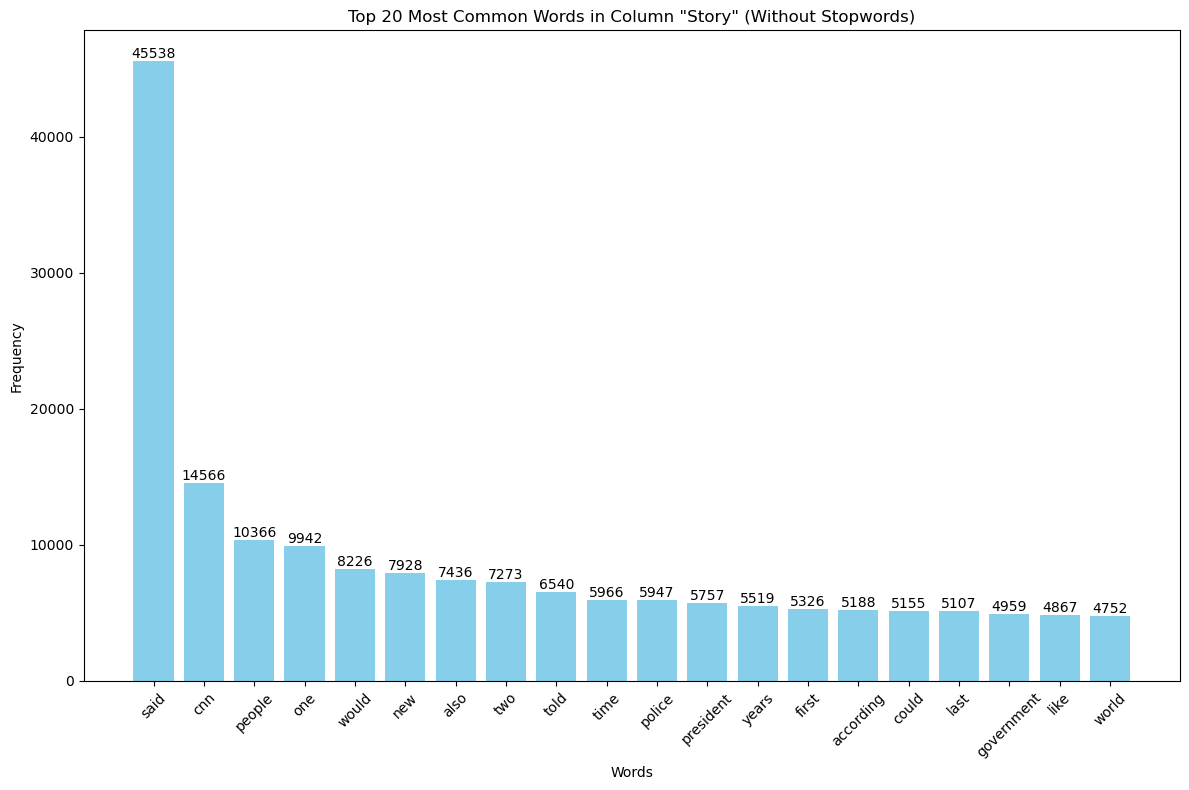

In [34]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Pastikan stopwords untuk bahasa Inggris telah diunduh
nltk.download('stopwords')
nltk.download('punkt')

# Stopwords untuk bahasa Inggris
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghilangkan stopwords dan karakter non-alfabet dari teks
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Menggabungkan semua teks dari kolom 'story'
all_texts = ' '.join(train_set['story'].dropna())

# Tokenisasi dan hapus stopwords dari all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Hitung frekuensi kata
word_counts = Counter(filtered_words)

# Dapatkan 20 kata paling umum
top_20_words = word_counts.most_common(20)

# Visualisasikan 20 kata paling umum menggunakan bar chart
plt.figure(figsize=(12, 8))
words, counts = zip(*top_20_words)
bars = plt.bar(words, counts, color='skyblue')

# Tambahkan anotasi ke setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Pengaturan label dan judul
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Column "Story" (Without Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


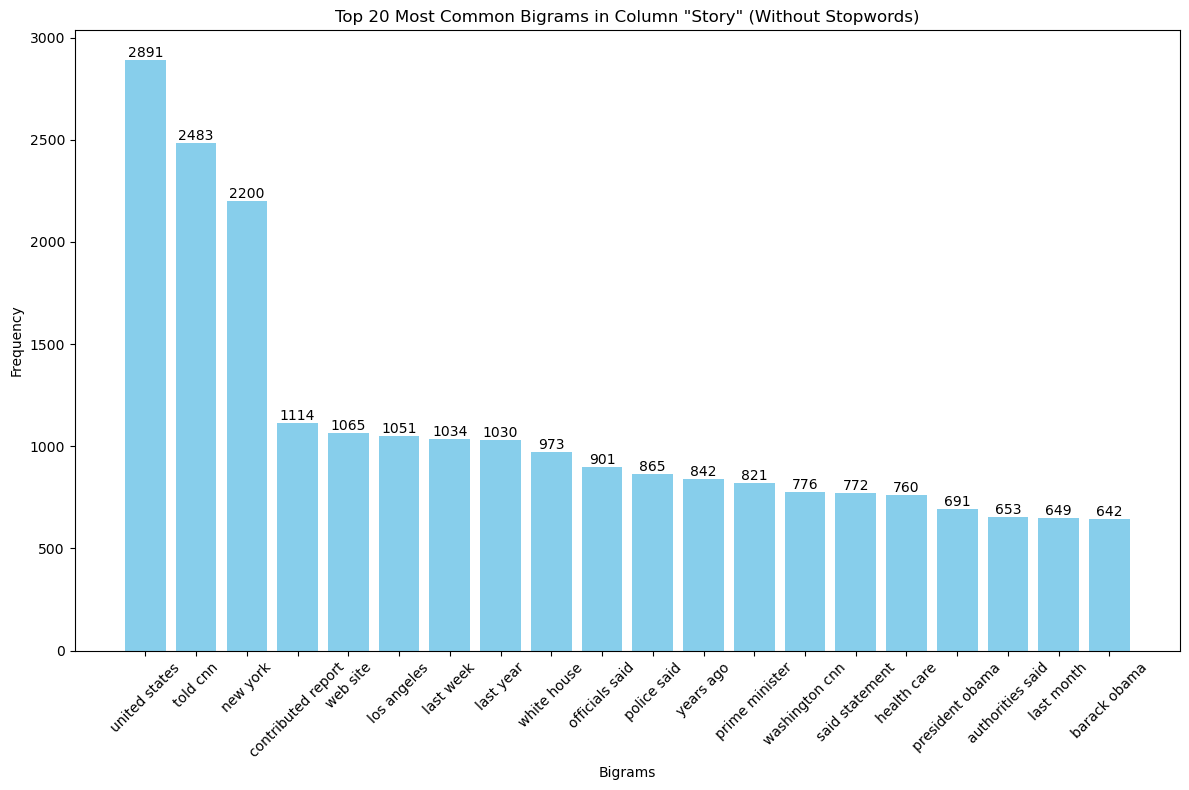

In [35]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.util import ngrams

# Pastikan stopwords untuk bahasa Inggris telah diunduh
nltk.download('stopwords')
nltk.download('punkt')

# Stopwords untuk bahasa Inggris
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghilangkan stopwords dan karakter non-alfabet dari teks
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Menggabungkan semua teks dari kolom 'story'
all_texts = ' '.join(train_set['story'].dropna())

# Tokenisasi dan hapus stopwords dari all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Membuat bigram dari teks yang sudah difilter
bigrams = list(ngrams(filtered_words, 2))

# Hitung frekuensi bigram
bigram_counts = Counter(bigrams)

# Dapatkan 20 bigram paling umum
top_20_bigrams = bigram_counts.most_common(20)

# Visualisasikan 20 bigram paling umum menggunakan bar chart
plt.figure(figsize=(12, 8))
bigrams, counts = zip(*top_20_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigrams]
bars = plt.bar(bigram_labels, counts, color='skyblue')

# Tambahkan anotasi ke setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Pengaturan label dan judul
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Bigrams in Column "Story" (Without Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


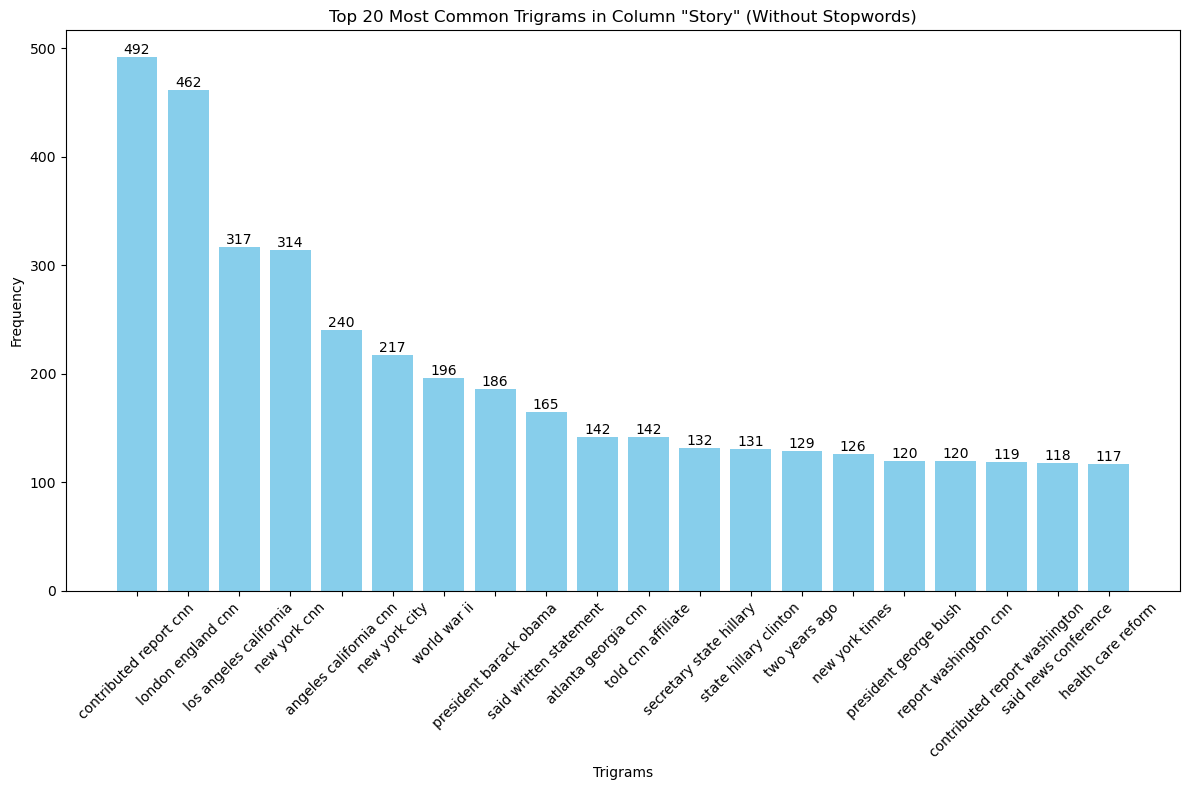

In [36]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.util import ngrams

# Pastikan stopwords dan tokenizer untuk bahasa Inggris telah diunduh
nltk.download('stopwords')
nltk.download('punkt')

# Stopwords untuk bahasa Inggris
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghilangkan stopwords dan karakter non-alfabet dari teks
def remove_stopwords_and_non_alpha(text):
    return [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]

# Menggabungkan semua teks dari kolom 'story'
all_texts = ' '.join(train_set['story'].dropna())

# Tokenisasi dan hapus stopwords dari all_texts
filtered_words = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Membuat trigram dari teks yang sudah difilter
trigrams = list(ngrams(filtered_words, 3))

# Hitung frekuensi trigram
trigram_counts = Counter(trigrams)

# Dapatkan 20 trigram paling umum
top_20_trigrams = trigram_counts.most_common(20)

# Visualisasikan 20 trigram paling umum menggunakan bar chart
plt.figure(figsize=(12, 8))
trigrams, counts = zip(*top_20_trigrams)
trigram_labels = [' '.join(trigram) for trigram in trigrams]
bars = plt.bar(trigram_labels, counts, color='skyblue')

# Tambahkan anotasi ke setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Pengaturan label dan judul
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Trigrams in Column "Story" (Without Stopwords)')
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan plot
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


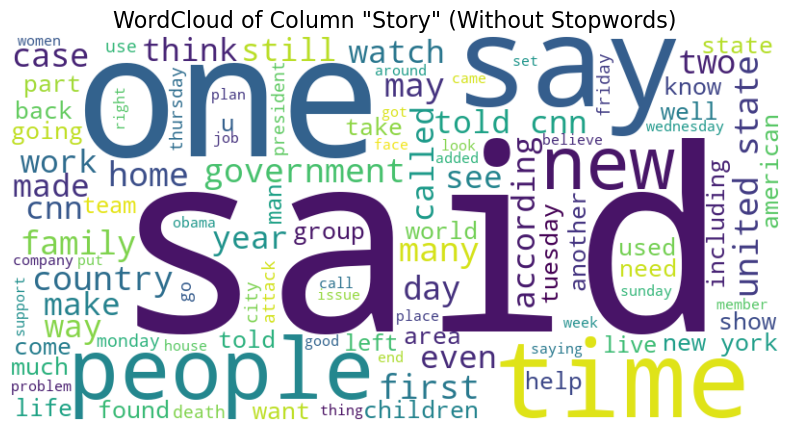

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Pastikan stopwords dan tokenizer untuk bahasa Inggris telah diunduh
nltk.download('stopwords')
nltk.download('punkt')

# Stopwords untuk bahasa Inggris
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghilangkan stopwords dan karakter non-alfabet dari teks
def remove_stopwords_and_non_alpha(text):
    return ' '.join([word.lower() for word in text if word.lower() not in stop_words and word.isalpha()])

# Gabungkan semua teks dari kolom 'story'
all_texts = ' '.join(train_set['story'].dropna())

# Tokenisasi, hapus stopwords, dan karakter non-alfabet dari all_texts
cleaned_text = remove_stopwords_and_non_alpha(word_tokenize(all_texts))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(cleaned_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan axis
plt.title('WordCloud of Column "Story" (Without Stopwords)', fontsize=16)
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


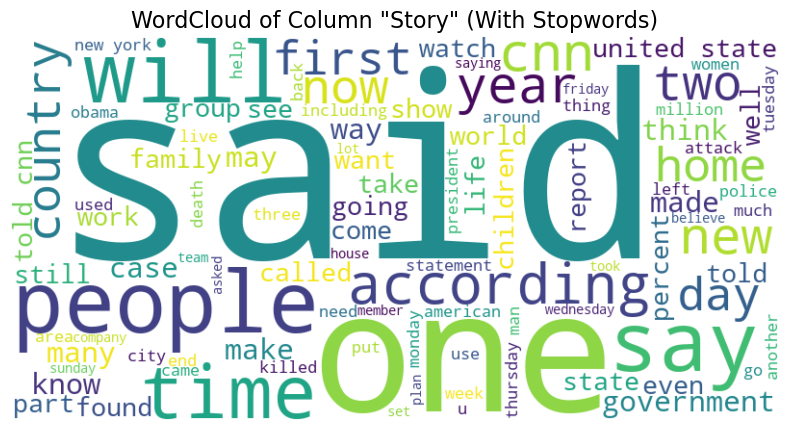

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Pastikan tokenizer untuk bahasa Inggris telah diunduh
nltk.download('punkt')

# Fungsi untuk membersihkan karakter non-alfabet dari teks (tanpa menghapus stopwords)
def remove_non_alpha(text):
    return ' '.join([word.lower() for word in text if word.isalpha()])

# Gabungkan semua teks dari kolom 'story'
all_texts = ' '.join(train_set['story'].dropna())

# Tokenisasi dan bersihkan karakter non-alfabet dari all_texts (tanpa menghapus stopwords)
cleaned_text = remove_non_alpha(word_tokenize(all_texts))

# Buat WordCloud (kali ini dengan stopwords)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(cleaned_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan axis
plt.title('WordCloud of Column "Story" (With Stopwords)', fontsize=16)
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


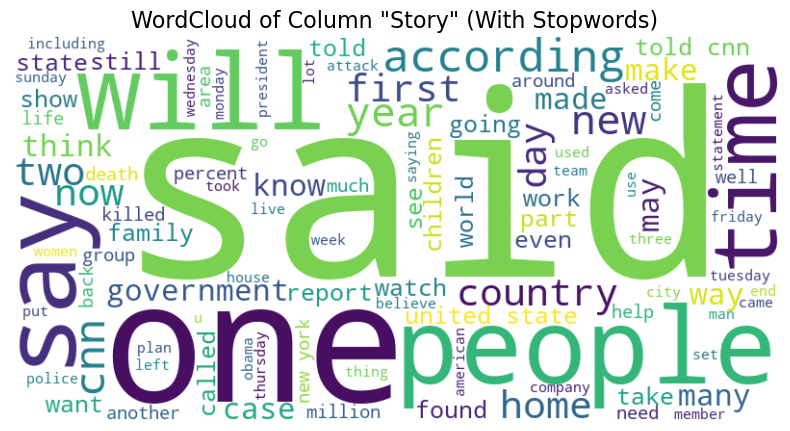

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Pastikan tokenizer untuk bahasa Inggris telah diunduh
nltk.download('punkt')

# Fungsi untuk membersihkan karakter non-alfabet dari teks (tanpa menghapus stopwords)
def remove_non_alpha(text):
    return ' '.join([word.lower() for word in text if word.isalpha()])

# Gabungkan semua teks dari kolom 'story'
all_texts = ' '.join(train_set['story'].dropna())

# Tokenisasi dan bersihkan karakter non-alfabet dari all_texts (tanpa menghapus stopwords)
cleaned_text = remove_non_alpha(word_tokenize(all_texts))

# Buat WordCloud (kali ini dengan stopwords)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(cleaned_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan axis
plt.title('WordCloud of Column "Story" (With Stopwords)', fontsize=16)
plt.show()


In [165]:
import pandas as pd
import re

# Definisikan pola regex untuk mengekstrak frasa
pattern = re.compile(
        r'^.*?--\s?', re.MULTILINE | re.IGNORECASE
    )

# Fungsi untuk mengekstrak frasa sesuai pola
def extract_header(text):
    headers = pattern.findall(text)
    return ', '.join(headers) if headers else None

In [166]:
# Ekstrak header dari kolom 'story'
train_set['extracted_header'] = train_set['story'].apply(extract_header)

In [167]:
train_set

,story,questions,answers,summary,extract_emoji,longest_word,contains_url,stopwords,word_count,extracted_header,extracted_video,cleaned_story
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing,False,"It, all, down, to, It, doesn't, all, that, wha...",645,"(InStyle) -- , In the beginning a few people q...",None,It all boils down to this. It doesn't really m...
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,",False,"The, at, has, been, by, the, of, an, and, in, ...",690,"Brooklyn, New York (VBS.TV) -- , The summer/ f...",None,Editor's Note: The staff at CNN.com has recent...
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,,"investment-friendly,",False,"his, is, in, at, how, the, from, to, of, most,...",698,(CNN) --,None,"Leszek Balcerowicz, Poland's former finance mi..."
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening,False,"and, in, the, have, in, the, in, the, in, more...",646,"JACKSON, Tennessee (CNN) --",None,Tornadoes and storms in the mid-South have kil...
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,,investigator,False,"In, the, of, have, the, is, a, of, after, of, ...",496,(CNN) --,None,"In the black market of prison life, cell phone..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered,False,"More, than, a, after, a, at, there, is, no, fr...",521,"CIANJUR, Indonesia (CNN) --",None,More than a day after a major earthquake jolte...
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,""",False,"The, of, are, after, a, over, the, of, their, ...",606,"ATLANTA, Georgia (CNN) --",None,The three surviving children of civil rights l...
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.,False,"At, were, and, more, than, after, a, out, at, ...",465,"BANGKOK, Thailand (CNN) --",None,At least 59 people were killed and more than 2...
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue,False,"A, for, in, A, out, in, A, a, of, of, has, fro...",630,(CNN) --,None,"A call for Smurfs brought together 1,253 dress..."


In [70]:
# Definisikan pola regex untuk mengekstrak frasa setelah "VIDEO:" hingga titik berikutnya
pattern = re.compile(r'VIDEO:.*?(?:\.\s|$)', re.IGNORECASE)

# Fungsi untuk mengekstrak frasa sesuai pola
def extract_video(text):
    # Temukan semua frasa yang dimulai dengan "VIDEO:" dan berakhir dengan titik atau akhir teks
    videos = pattern.findall(text)
    # Gabungkan hasil menjadi satu string jika ada
    return ', '.join(videos).strip() if videos else None

In [71]:
# Ekstrak frasa yang dimulai dengan "VIDEO:" dari kolom 'story'
train_set['extracted_video'] = train_set['story'].apply(extract_video)

In [72]:
train_set

,story,questions,answers,summary,extract_emoji,longest_word,contains_url,stopwords,word_count,extracted_header,extracted_video
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,,40-years-and-growing,False,"It, all, down, to, It, doesn't, all, that, wha...",645,(InStyle) --,None
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,,"Williamsburg,",False,"The, at, has, been, by, the, of, an, and, in, ...",690,None,None
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,,"investment-friendly,",False,"his, is, in, at, how, the, from, to, of, most,...",698,(CNN) --,None
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,,life-threatening,False,"and, in, the, have, in, the, in, the, in, more...",646,"JACKSON, Tennessee (CNN) --",None
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,,investigator,False,"In, the, of, have, the, is, a, of, after, of, ...",496,(CNN) --,None
...,...,...,...,...,...,...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",,quake-triggered,False,"More, than, a, after, a, at, there, is, no, fr...",521,None,None
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,,"disagreements,""",False,"The, of, are, after, a, over, the, of, their, ...",606,"ATLANTA, Georgia (CNN) --",None
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,,Deeprasertwit.,False,"At, were, and, more, than, after, a, out, at, ...",465,None,None
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...",,dressed-up-in-blue,False,"A, for, in, A, out, in, A, a, of, of, has, fro...",630,(CNN) --,None


In [73]:
# Menampilkan baris yang memiliki nilai non-null di kolom 'extracted_video'
rows_with_video = train_set[train_set['extracted_video'].notnull()]

# Tampilkan hasil
rows_with_video

,story,questions,answers,summary,extract_emoji,longest_word,contains_url,stopwords,word_count,extracted_header,extracted_video
2888,"(CNN) -- More than nuclear bomb tests, the sui...","[What is a complex mix of issues?, What is hon...","[[""People at risk can see Roh's death as an ex...",South Korea has one of the highest rates of su...,,"responsibility,""",False,"More, than, the, of, has, the, While, the, has...",673,(CNN) --,Video: How South Korean continue mourning » Hi...


## Data Preprocessing

In [31]:
import re
import pandas as pd

def clean_text(text):
    # Definisikan pola regex untuk berbagai pembersihan
    url_pattern = re.compile(r'https?://\S+|www\.\S+', re.IGNORECASE)
    hashtag_pattern = re.compile(r'#\w+', re.IGNORECASE)
    double_space_pattern = re.compile(r'\s\s+')
    # Memperbaiki pola untuk menangkap header dengan lebih baik
    header_pattern = re.compile(r'^.*?--\s?', re.IGNORECASE)
    video_pattern = re.compile(r'VIDEO:.*?(?:\.\s|$)', re.IGNORECASE)

    # Hapus URL
    text = url_pattern.sub('', text)

    # Hapus hashtag
    text = hashtag_pattern.sub('', text)

    # Cek jika ada '--' dalam 40 karakter pertama
    if '--' in text[:40]:
        # Hapus header sebelum '--'
        text = header_pattern.sub('', text).strip()

    # Hapus frasa "VIDEO:" hingga titik
    text = video_pattern.sub('', text)

    # Hapus double space
    text = double_space_pattern.sub(' ', text)

    # Trim leading and trailing spaces
    text = text.strip()

    return text

In [32]:
train_set['cleaned_story'] = train_set['story'].apply(clean_text)

In [33]:
val_set['cleaned_story'] = val_set['story'].apply(clean_text)

In [34]:
train_set

,story,questions,answers,summary,cleaned_story
4726,(InStyle) -- It all boils down to this. It doe...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman...",Ralph Lauren began as tie salesman from the Br...,It all boils down to this. It doesn't really m...
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would...",VBS.TV visits home for elderly prostitutes in ...,Editor's Note: The staff at CNN.com has recent...
2724,"(CNN) -- Leszek Balcerowicz, Poland's former f...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]...",Poland was ruled by Soviet-backed regime after...,"Leszek Balcerowicz, Poland's former finance mi..."
6550,"JACKSON, Tennessee (CNN) -- Tornadoes and stor...",[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]...",NEW: Death toll rises to 55 with report of a 1...,Tornadoes and storms in the mid-South have kil...
2452,"(CNN) -- In the black market of prison life, c...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ...",Texas is among a growing number of states goin...,"In the black market of prison life, cell phone..."
...,...,...,...,...,...
5734,"CIANJUR, Indonesia (CNN) -- More than a day a...",[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan...","NEW: At least 57 killed, another 400 injured, ...",More than a day after a major earthquake jolte...
5191,"ATLANTA, Georgia (CNN) -- The three surviving ...","[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...,Children of slain civil rights leader decide t...,The three surviving children of civil rights l...
5390,"BANGKOK, Thailand (CNN) -- At least 59 people...","[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...,Thai police say that 59 died in nightclub fire...,At least 59 people were killed and more than 2...
860,"(CNN) -- A call for Smurfs brought together 1,...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4...","1,253 Smurfs gather in Ireland, find place in ...","A call for Smurfs brought together 1,253 dress..."


In [35]:
val_set

,story,questions,answers,summary,cleaned_story
8954,"ROME, Italy -- Captain Javier Zanetti saved In...","[Who scored a late goal?, What position is AC ...","[[Javier Zanetti], [fifth place], [fifth], [Ca...",Javier Zanetti scores a late goal to earn Inte...,Captain Javier Zanetti saved Inter Milan's unb...
6495,"In Fad-Free Nutrition, exclusively on CNN.com,...","[which brands were affected by the recall?, Wh...","[[industrial peanut butter], [industrial peanu...",Peanut product recall putting a damper on Amer...,"In Fad-Free Nutrition, exclusively on CNN.com,..."
4184,(CNN) -- There's always been something about M...,"[Who suffers from dementia?, What Torrance sai...","[[Baroness Thatcher's], [a pitch-perfect perfo...","David Torrance: Margaret Thatcher biopic ""The ...",There's always been something about Margaret T...
7015,"LONDON, England (CNN) -- Britain's Queen Eliza...","[what is the medal made out of?, What was the ...","[[sterling silver emblem], [a sterling silver ...",Elizabeth Cross for next of kin of armed force...,Britain's Queen Elizabeth II unveiled a new me...
5860,"DERBY, England -- Substitute Emmanuel Adebayor...","[What park did Arsenal defeat Derby?, What num...","[[Pride], [four], [Emmanuel Adebayor]]",Emmanuel Adebayor hits hat-trick as Arsenal th...,Substitute Emmanuel Adebayor struck his second...
...,...,...,...,...,...
7924,MEXICO CITY (CNN) -- Mexican President Felipe ...,"[Which commodity will have its price frozen?, ...","[[gasoline], [small- and medium-size], [Presid...",Mexico leader says gasoline prices will be fro...,Mexican President Felipe Calderon outlined a s...
1527,(CNN) -- Authorities are investigating a lette...,"[To whom was the bomb addressed?, what does Ne...","[[CEO of Deutsche Bank], [The device, which co...",A letter bomb is addressed to the CEO of Deuts...,Authorities are investigating a letter bomb ad...
8922,"RIO DE JANEIRO, Brazil (CNN) -- The death toll...","[What is the death toll in southern Brazil?, W...","[[116], [be careful with food and water they c...",Death toll from flooding in southern Brazil re...,The death toll in flood-ravaged southern Brazi...
3352,(CNN) -- Scientists say a very rare find of so...,[How many fossilized pterodactyls were found i...,"[[20], [researchers], [evidence of a controver...",Researchers say rare fossil find provides evid...,Scientists say a very rare find of some 20 fos...


In [36]:
df_train = train_set[['cleaned_story','questions','answers']]
df_val = val_set[['cleaned_story','questions','answers']]

In [37]:
df_train

,cleaned_story,questions,answers
4726,It all boils down to this. It doesn't really m...,"[Who started as a tie salesman?, For how long ...","[[Ralph Lauren], [four decades], [tie salesman..."
5960,Editor's Note: The staff at CNN.com has recent...,"[Where did VBS.TV travel to?, what kind of ban...","[[Iraq.], [heavy metal], [locations that would..."
2724,"Leszek Balcerowicz, Poland's former finance mi...","[When was Poland ruled by the soviet regime?, ...","[[during the Second World War.], [communists,]..."
6550,Tornadoes and storms in the mid-South have kil...,[Tornado outbreak was deadliest in U.S. in how...,"[[more than 20 years.], [Tornadoes and storms]..."
2452,"In the black market of prison life, cell phone...","[What are training dogs for?, What are dogs tr...","[[to sniff out cell phones.], [sniff out cell ..."
...,...,...,...
5734,More than a day after a major earthquake jolte...,[Which Island was hit by quakes three weeks ag...,"[[Sumatra.], [More than 400], [tens of thousan..."
5191,The three surviving children of civil rights l...,"[Who will avoid trial?, The children of slain ...",[[The three surviving children of civil rights...
5390,At least 59 people were killed and more than 2...,"[What caused most of the deaths?, What caused ...",[[of the victims died from smoke inhalation or...
860,"A call for Smurfs brought together 1,253 dress...","[What was released on Thursday?, How many reco...","[[Guinness World Records 2010 book,], [about 4..."


In [38]:
df_val

,cleaned_story,questions,answers
8954,Captain Javier Zanetti saved Inter Milan's unb...,"[Who scored a late goal?, What position is AC ...","[[Javier Zanetti], [fifth place], [fifth], [Ca..."
6495,"In Fad-Free Nutrition, exclusively on CNN.com,...","[which brands were affected by the recall?, Wh...","[[industrial peanut butter], [industrial peanu..."
4184,There's always been something about Margaret T...,"[Who suffers from dementia?, What Torrance sai...","[[Baroness Thatcher's], [a pitch-perfect perfo..."
7015,Britain's Queen Elizabeth II unveiled a new me...,"[what is the medal made out of?, What was the ...","[[sterling silver emblem], [a sterling silver ..."
5860,Substitute Emmanuel Adebayor struck his second...,"[What park did Arsenal defeat Derby?, What num...","[[Pride], [four], [Emmanuel Adebayor]]"
...,...,...,...
7924,Mexican President Felipe Calderon outlined a s...,"[Which commodity will have its price frozen?, ...","[[gasoline], [small- and medium-size], [Presid..."
1527,Authorities are investigating a letter bomb ad...,"[To whom was the bomb addressed?, what does Ne...","[[CEO of Deutsche Bank], [The device, which co..."
8922,The death toll in flood-ravaged southern Brazi...,"[What is the death toll in southern Brazil?, W...","[[116], [be careful with food and water they c..."
3352,Scientists say a very rare find of some 20 fos...,[How many fossilized pterodactyls were found i...,"[[20], [researchers], [evidence of a controver..."


In [39]:
formatted_data = []

# Proses untuk memecah data menjadi beberapa baris berdasarkan pertanyaan dan jawaban
for idx, row in df_train.iterrows():
    context = row['cleaned_story']
    questions = row['questions']
    answers = row['answers']
    
    for i, question in enumerate(questions):
        answer_text = answers[i][0]  
        answer_start = context.find(answer_text) 

        # Membuat dictionary dengan format yang diinginkan
        formatted_data.append({
            'context': context,
            'question': question,
            'answers': {
                'text': [answer_text],
                'answer_start': [answer_start] if answer_start != -1 else [] 
            }
        })

# Convert ke DataFrame
df_formatted = pd.DataFrame(formatted_data)

# cek dataframe
print(df_formatted.head())

                                             context  \
0  It all boils down to this. It doesn't really m...   
1  It all boils down to this. It doesn't really m...   
2  It all boils down to this. It doesn't really m...   
3  It all boils down to this. It doesn't really m...   
4  It all boils down to this. It doesn't really m...   

                                     question  \
0              Who started as a tie salesman?   
1  For how long has he designed high fashion?   
2                   What did Lauren start as?   
3              What makes clothing glamorous?   
4                           Lauren sold what?   

                                             answers  
0  {'text': ['Ralph Lauren'], 'answer_start': [434]}  
1  {'text': ['four decades'], 'answer_start': [512]}  
2  {'text': ['tie salesman'], 'answer_start': [703]}  
3  {'text': ['Polo because "it was the sport of k...  
4          {'text': ['ties'], 'answer_start': [271]}  


In [40]:
df_formatted

,context,question,answers
0,It all boils down to this. It doesn't really m...,Who started as a tie salesman?,"{'text': ['Ralph Lauren'], 'answer_start': [434]}"
1,It all boils down to this. It doesn't really m...,For how long has he designed high fashion?,"{'text': ['four decades'], 'answer_start': [512]}"
2,It all boils down to this. It doesn't really m...,What did Lauren start as?,"{'text': ['tie salesman'], 'answer_start': [703]}"
3,It all boils down to this. It doesn't really m...,What makes clothing glamorous?,"{'text': ['Polo because ""it was the sport of k..."
4,It all boils down to this. It doesn't really m...,Lauren sold what?,"{'text': ['ties'], 'answer_start': [271]}"
...,...,...,...
57219,"The days are getting shorter, the nights colde...",Where is the experiment taking place?,"{'text': ['Britain's Scilly Isles'], 'answer_s..."
57220,"The days are getting shorter, the nights colde...",Where is the Scilly Isles?,"{'text': ['28 miles off Land's End,'], 'answer..."
57221,"The days are getting shorter, the nights colde...",How many days long was the Earth Summit?,"{'text': ['four-day'], 'answer_start': [3226]}"
57222,"The days are getting shorter, the nights colde...",What is E-Day?,"{'text': ['homes, schools and businesses on th..."


In [41]:
import pandas as pd
formatted_data_val = []

for idx, row in df_val.iterrows():  
    context = row['cleaned_story']
    questions = row['questions']
    answers = row['answers']
    
    for i, question in enumerate(questions):
        answer_text = answers[i][0] 
        answer_start = context.find(answer_text) 

        # Membuat dictionary dengan format yang diinginkan
        formatted_data_val.append({
            'context': context,
            'question': question,
            'answers': {
                'text': [answer_text],
                'answer_start': [answer_start] if answer_start != -1 else []
            }
        })

# Convert ke DataFrame
df_formatted_val = pd.DataFrame(formatted_data_val)

# cek dataframe
print(df_formatted_val.head())

                                             context  \
0  Captain Javier Zanetti saved Inter Milan's unb...   
1  Captain Javier Zanetti saved Inter Milan's unb...   
2  Captain Javier Zanetti saved Inter Milan's unb...   
3  Captain Javier Zanetti saved Inter Milan's unb...   
4  Captain Javier Zanetti saved Inter Milan's unb...   

                                        question  \
0                        Who scored a late goal?   
1                  What position is AC Milan at?   
2          What position did AC Milan slip into?   
3                      Who scored the late goal?   
4  Which team retains their unbeaten league run?   

                                             answers  
0  {'text': ['Javier Zanetti'], 'answer_start': [8]}  
1  {'text': ['fifth place'], 'answer_start': [1878]}  
2        {'text': ['fifth'], 'answer_start': [1878]}  
3  {'text': ['Captain Javier Zanetti'], 'answer_s...  
4  {'text': ['Inter Milan's'], 'answer_start': [29]}  


In [42]:
df_formatted_val

,context,question,answers
0,Captain Javier Zanetti saved Inter Milan's unb...,Who scored a late goal?,"{'text': ['Javier Zanetti'], 'answer_start': [8]}"
1,Captain Javier Zanetti saved Inter Milan's unb...,What position is AC Milan at?,"{'text': ['fifth place'], 'answer_start': [1878]}"
2,Captain Javier Zanetti saved Inter Milan's unb...,What position did AC Milan slip into?,"{'text': ['fifth'], 'answer_start': [1878]}"
3,Captain Javier Zanetti saved Inter Milan's unb...,Who scored the late goal?,"{'text': ['Captain Javier Zanetti'], 'answer_s..."
4,Captain Javier Zanetti saved Inter Milan's unb...,Which team retains their unbeaten league run?,"{'text': ['Inter Milan's'], 'answer_start': [29]}"
...,...,...,...
14330,Scientists say a very rare find of some 20 fos...,Who says rare fossil find provides evidence of...,"{'text': ['Scientists'], 'answer_start': [0]}"
14331,Scientists say a very rare find of some 20 fos...,How many fossilized pterodactyls found in Chin...,"{'text': ['20'], 'answer_start': [40]}"
14332,At a hacker conference no one is safe. Demogra...,What was passed around at conference?,"{'text': ['USB thumb drive'], 'answer_start': ..."
14333,At a hacker conference no one is safe. Demogra...,What was passed around at the conference?,"{'text': ['USB thumb drive'], 'answer_start': ..."


In [43]:
# Tambahkan kolom id yang unik ke df_formatted
df_formatted['id'] = range(1, len(df_formatted) + 1)

# Tambahkan kolom id yang unik ke df_formatted_val
df_formatted_val['id'] = range(len(df_formatted) + 1, len(df_formatted) + len(df_formatted_val) + 1)

In [44]:
df_formatted

,context,question,answers,id
0,It all boils down to this. It doesn't really m...,Who started as a tie salesman?,"{'text': ['Ralph Lauren'], 'answer_start': [434]}",1
1,It all boils down to this. It doesn't really m...,For how long has he designed high fashion?,"{'text': ['four decades'], 'answer_start': [512]}",2
2,It all boils down to this. It doesn't really m...,What did Lauren start as?,"{'text': ['tie salesman'], 'answer_start': [703]}",3
3,It all boils down to this. It doesn't really m...,What makes clothing glamorous?,"{'text': ['Polo because ""it was the sport of k...",4
4,It all boils down to this. It doesn't really m...,Lauren sold what?,"{'text': ['ties'], 'answer_start': [271]}",5
...,...,...,...,...
57219,"The days are getting shorter, the nights colde...",Where is the experiment taking place?,"{'text': ['Britain's Scilly Isles'], 'answer_s...",57220
57220,"The days are getting shorter, the nights colde...",Where is the Scilly Isles?,"{'text': ['28 miles off Land's End,'], 'answer...",57221
57221,"The days are getting shorter, the nights colde...",How many days long was the Earth Summit?,"{'text': ['four-day'], 'answer_start': [3226]}",57222
57222,"The days are getting shorter, the nights colde...",What is E-Day?,"{'text': ['homes, schools and businesses on th...",57223


In [45]:
df_formatted_val

,context,question,answers,id
0,Captain Javier Zanetti saved Inter Milan's unb...,Who scored a late goal?,"{'text': ['Javier Zanetti'], 'answer_start': [8]}",57225
1,Captain Javier Zanetti saved Inter Milan's unb...,What position is AC Milan at?,"{'text': ['fifth place'], 'answer_start': [1878]}",57226
2,Captain Javier Zanetti saved Inter Milan's unb...,What position did AC Milan slip into?,"{'text': ['fifth'], 'answer_start': [1878]}",57227
3,Captain Javier Zanetti saved Inter Milan's unb...,Who scored the late goal?,"{'text': ['Captain Javier Zanetti'], 'answer_s...",57228
4,Captain Javier Zanetti saved Inter Milan's unb...,Which team retains their unbeaten league run?,"{'text': ['Inter Milan's'], 'answer_start': [29]}",57229
...,...,...,...,...
14330,Scientists say a very rare find of some 20 fos...,Who says rare fossil find provides evidence of...,"{'text': ['Scientists'], 'answer_start': [0]}",71555
14331,Scientists say a very rare find of some 20 fos...,How many fossilized pterodactyls found in Chin...,"{'text': ['20'], 'answer_start': [40]}",71556
14332,At a hacker conference no one is safe. Demogra...,What was passed around at conference?,"{'text': ['USB thumb drive'], 'answer_start': ...",71557
14333,At a hacker conference no one is safe. Demogra...,What was passed around at the conference?,"{'text': ['USB thumb drive'], 'answer_start': ...",71558


In [46]:
from datasets import Dataset, DatasetDict

# Konversi df_formatted dan df_formatted_val ke Dataset Hugging Face
train_dataset = Dataset.from_pandas(df_formatted)
validation_dataset = Dataset.from_pandas(df_formatted_val)

# Gabungkan kedua dataset ke dalam DatasetDict
dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': validation_dataset
})

# Menampilkan struktur DatasetDict
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['context', 'question', 'answers', 'id'],
        num_rows: 57224
    })
    validation: Dataset({
        features: ['context', 'question', 'answers', 'id'],
        num_rows: 14335
    })
})


In [47]:
from datasets import DatasetDict

# Assuming `dataset_dict` is your DatasetDict object
dataset_dict.save_to_disk('news-qa-data')

Saving the dataset (0/1 shards):   0%|          | 0/57224 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/14335 [00:00<?, ? examples/s]